Asia             3574
North America    1234
Europe           9876
South America    5376
Africa           3285
Oceania          8463
Antarctica          1
dtype: int64
Index(['Asia', 'North America', 'Europe', 'South America', 'Africa', 'Oceania',
       'Antarctica'],
      dtype='object')
1


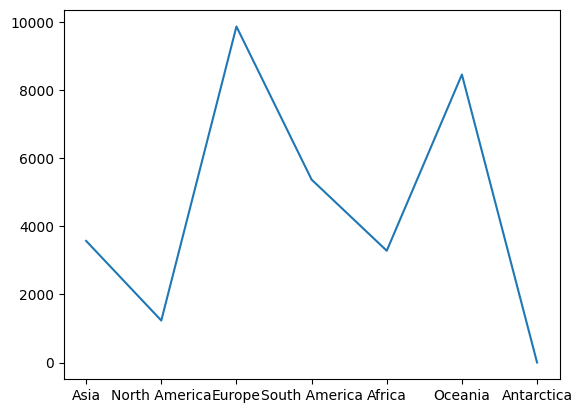

In [1]:
from pandas import Series


#Как добавить элементы в класс Series
gdp_regions = Series(data=[3574, 1234, 9876, 5376, 3285, 8463], index = ['Asia', 'North America','Europe', 'South America', 'Africa', 'Oceania'])
gdp_regions['Antarctica'] = 1 # Синтаксис добавления в Series (как у словаря).
gdp_regions.plot() #Может рисовать график
print(gdp_regions) #Выводит все значения ключ-значение
print(gdp_regions.index) #Выводит все индексы (ключи)
print(gdp_regions['Antarctica']) #Выводит значение с определенным ключом

In [2]:
s = Series(data = {'USA' : 28781,
                   'Russia' : 2056,
                   'Canada' : 2242,
                   'China' : 18532,
                   'South Korea' : 1760,
                   'France' : 3130,
                   'Germany' : 4591,
                   'UK' : 3495,
                   'Japan' : 4110
                   })
print(s['USA']) #Выбрать одно значение
print(s[['USA', 'China', 'Canada']]) #Вывести несколько значений в том порядке, в котором указали

assert s['USA'] == 28781 #Проверка на правильность. Если False, кидает ошибку AssertionError

s.loc['USA'] # индексирование

condition = s > 10000 #Создаёт новый Series, но с условием (с Булевыми значениями)

print(condition) #Выдаст Series со значениями True/False по условию

print(s[condition]) #Выдаёт уже выборку из первого Series, но с условием в conditions (s[conditions] также новый Series)

#Множественные условия
print('Countries with GDP between 2000 and 20000')
print(s[(s > 2000)&(s < 20000)])

#Множественные условия
print('Other countries: use ~ operator')
print(s[~((s > 2000) & (s < 20000))]) #Знак тильды ~ означает инверсию (то есть выбор стран, которые НЕ удовлетворяют условиям в скобках

print('Select by numeric index')
print(s[2]) #Выведет значение по 2 индексу
print(s[:5]) #Выводит с нулевого по 5 индекс (по 4 значение)
print(s[4:]) #Выводит с 4 индекса (то есть с 5 значения) и до конца
print(s.index[1:3]) #Выводит первый и второй индексы (3 не включительно, отсчёт с нуля)


28781
USA       28781
China     18532
Canada     2242
dtype: int64
USA             True
Russia         False
Canada         False
China           True
South Korea    False
France         False
Germany        False
UK             False
Japan          False
dtype: bool
USA      28781
China    18532
dtype: int64
Countries with GDP between 2000 and 20000
Russia      2056
Canada      2242
China      18532
France      3130
Germany     4591
UK          3495
Japan       4110
dtype: int64
Other countries: use ~ operator
USA            28781
South Korea     1760
dtype: int64
Select by numeric index
2242
USA            28781
Russia          2056
Canada          2242
China          18532
South Korea     1760
dtype: int64
South Korea    1760
France         3130
Germany        4591
UK             3495
Japan          4110
dtype: int64
Index(['Russia', 'Canada'], dtype='object')


C:\Users\stacy\AppData\Local\Temp\ipykernel_21348\404836420.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(s[2]) #Выведет значение по 2 индексу


In [3]:
# Проверка (тестирование)
from pandas import Series

gdp_regions = Series(data=[34931, 32095, 32125, 4043, 2722, 2028],
                     index = ['Asia', 'North America', 'Europe', 'South America', 'Africa', 'Oceania'])

assert 'Asia' in gdp_regions.keys() #Проверяем, есть ли элемент в ключах Series

assert 34931 in gdp_regions.values #Проверяем, есть ли такое значение в Series (ПОСЛЕ VALUES СКОБКИ НЕ НУЖНЫ!)

In [4]:
from pandas import Series

gdp_bln = Series(data={
    'USA' : 28781,
    'Russia' : 2056,
    'Canada' : 2242,
    'China' : 18532,
    'South Korea' : 1760,
    'France' : 3130,
    'Germany' : 4591,
    'UK' : 3495,
    'Japan' : 4110
})

gdp_as_pct = (gdp_bln / gdp_bln.max())*100 #Создаём Series, который выражает процентное соотношение от максимума (функция max() )
print(gdp_as_pct)

rounded_series = gdp_as_pct.apply(lambda x: round(x, 2)) #Создаём ещё Series, который с помощью .apply и лямбда-функции округляет значения
print(rounded_series)
rounded_series_percentages = gdp_as_pct.apply(lambda x: f"{round(x, 2)}%") #Добавляем значок % с помощью f-строки
print(rounded_series_percentages)

USA            100.000000
Russia           7.143602
Canada           7.789861
China           64.389702
South Korea      6.115145
France          10.875230
Germany         15.951496
UK              12.143428
Japan           14.280254
dtype: float64
USA            100.00
Russia           7.14
Canada           7.79
China           64.39
South Korea      6.12
France          10.88
Germany         15.95
UK              12.14
Japan           14.28
dtype: float64
USA            100.0%
Russia          7.14%
Canada          7.79%
China          64.39%
South Korea     6.12%
France         10.88%
Germany        15.95%
UK             12.14%
Japan          14.28%
dtype: object


In [6]:
#Конвертируем значения в Series (меняем валюту)
gdp_bln_2 = Series(data={
    'USA' : 28781,
    'Russia' : 2056,
    'Canada' : 2242,
    'China' : 18532,
    'South Korea' : 1760,
    'France' : 3130,
    'Germany' : 4591,
    'UK' : 3495,
    'Japan' : 4110
})

def convert(usd_value: float,
            currency:str,
            exchange_rates:dict[str, float]) -> float:
    ex_rate = exchange_rates[currency]
    return usd_value/ ex_rate
converted_gdp= gdp_bln_2.apply(func=convert, currency='EUR', exchange_rates={
    'GBP': 1.1,
    'EUR': 1.23,
    'CNY': 0.14
})

print('Convert using exchange rates:')
print(converted_gdp)


Convert using exchange rates:
USA            23399.186992
Russia          1671.544715
Canada          1822.764228
China          15066.666667
South Korea     1430.894309
France          2544.715447
Germany         3732.520325
UK              2841.463415
Japan           3341.463415
dtype: float64


In [8]:
# Агрегатные функции
gdp_bln_3 = Series(data={
    'USA' : 28781,
    'Russia' : 2056,
    'Canada' : 2242,
    'China' : 18532,
    'South Korea' : 1760,
    'France' : 3130,
    'Germany' : 4591,
    'UK' : 3495,
    'Japan' : 4110
})
max_gdp = gdp_bln_3.max() # .max - выдаёт максимальное значение
mean_gdp = gdp_bln_3.mean() # .mean - среднее значение
median_gdp = gdp_bln_3.median() # .median - выдаёт медиану
sum_gdp = gdp_bln_3.sum() # .sum считает сумму

print(f'max = {max_gdp}')
print(f'mean = {round(mean_gdp)}') #Округляем до целого
print(f'median = {round(median_gdp)}') #Округляем до целого
print(f'sum = {sum_gdp}')


max = 28781
mean = 7633
median = 3495
sum = 68697


In [9]:
from pandas import Series

usd_sales = Series(data=[112, 234, 345, 456],
                   index = ['jan','feb', 'mar', 'apr'])

rub_per_usd_rate = Series(data=[80, 81, 90, 85, 76, 87, 92, 95, 101, 99, 96, 88],
                          index=['jan','feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
rus_sales: Series = usd_sales * rub_per_usd_rate #Series, в отличие от Dictionary может работать с другими Series даже при отсутствии некоторых данных. Где данные отсутствуют - выдаёт NaN

#rus_sales #Можем выводить даже без функции print
# rus_sales.dropna() #Удаляем значения со значением NaN

rub_sales_no_nan = usd_sales.multiply(rub_per_usd_rate, fill_value=0)
"""Можно перемножать Series-ы с помощью функции .multiply.
В fill_value указывается значение, которым заменяется значения, которых нет в Series"""
print(f' rub_sales_no_nan\n{rub_sales_no_nan}')

"""При работе с разными Series (напр, при их перемножении) результат выводится по индексам в алфавитном порядке. Чтобы месяцы выдавались в правильном порядке, в строке перемножения месяцы надо проиндексировать"""
rub_sales_no_nan_2=usd_sales.multiply(rub_per_usd_rate, fill_value=0).reindex(rub_per_usd_rate.index)
print(f'упорядоченные месяцы\n{rub_sales_no_nan_2}')

#Если хотим вывести значения по месяцам, в которых были продажи, нужно индексировать по таблице usd_sales
rub_sales_by_month_of_orders=usd_sales.multiply(rub_per_usd_rate).reindex(usd_sales.index)
print(f'значения по месяцам, в которых были продажи\n{rub_sales_by_month_of_orders}')

 rub_sales_no_nan
apr    38760.0
aug        0.0
dec        0.0
feb    18954.0
jan     8960.0
jul        0.0
jun        0.0
mar    31050.0
may        0.0
nov        0.0
oct        0.0
sep        0.0
dtype: float64
упорядоченные месяцы
jan     8960.0
feb    18954.0
mar    31050.0
apr    38760.0
may        0.0
jun        0.0
jul        0.0
aug        0.0
sep        0.0
oct        0.0
nov        0.0
dec        0.0
dtype: float64
значения по месяцам, в которых были продажи
jan     8960.0
feb    18954.0
mar    31050.0
apr    38760.0
dtype: float64


In [10]:
# Типы данных pandas и их преобразование
from pandas import Series


s1 = Series(data=[1, 2, 3, 4, 5],
            index=list('abcde')) #Функция list превращает строку abcde в отдельные ключи (в массив) a, b, c, d, e

s2 = Series(data=[10, 20, 30, 40, None, 60], #Числа и None
            index=list('abcdef'))

s3 = Series(data =['123', '234', '345', 456],#Строки + число
            index=list('abcd'))

# print(s1) #Тип данных int64
# print(s2) #Тип данных float64 (int числа + None)
# print(s3) #Тип данных object (строки str + int число)
# print (s1+s2) #Тип данных float64 (сложили int и float)

s = Series(data=['123', '234', '345', 456],
           index=list('abcd'))
print(f'Series type is {s.dtype}') #Смотрим тип данных в Series

int_series = s.astype('int64') #Преобразуем из object в int
print(f'Тип после преобразрвания:\n{int_series}')

Series type is object
Тип после преобразрвания:
a    123
b    234
c    345
d    456
dtype: int64


In [12]:
# Как добавлять и удалять ключи и значения
gpd_regions1 = Series(data=[34931, 32095, 23125, 4043, 2722, 2028],
                      index = ['Asia', 'North America', 'Europe', 'South America', 'Africa', 'Oceania'])

gpd_regions1['Arctica'] = 5 #Добавляем ключ и значение
gpd_regions1['Antarctica'] = 10 #Добавляем ключ и значение
assert 'Arctica' in gpd_regions1.keys() #Проверяем наличие ключа

del gpd_regions1['Oceania'] # del - удаляем один ключ и его значение в Series
assert 'Oceania' not in gpd_regions1.keys() #Проверяем удаление

gpd_regions1.drop(labels=['Arctica', 'Antarctica'], inplace=True)
"""С помощью .drop можно удалить несколько ключ-значений.
Параметр inplace=True позволяет переписать тот же Series без создания нового"""
assert 'Arctica', 'Antarctica' not in gpd_regions1.keys() #Проверка удаления